# Advanced Data Science - Capstone Project

## Data Exploration - V.1.0

### Carlos Granados

For this project I decided to use solar power generation data uploaded by [Ani Kannal](https://www.kaggle.com/anikannal "Ani Kannal Profile") in [kaggle.com website](https://www.kaggle.com/anikannal/solar-power-generation-data?select=Plant_1_Generation_Data.csv "Data Set from kaggle"). The idea is to predict the power generation given different weather conditions, as temperature and irradiation, and check the health of the devices.

### 1. Install PySpark:

In [1]:
# For the first part using more pandas than spark...

#!pip install pyspark==2.4.5

In [2]:
#try:
#    from pyspark import SparkContext, SparkConf
#    from pyspark.sql import SparkSession
#except ImportError as e:
#    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [3]:
#sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
#
#spark = SparkSession \
#    .builder \
#    .getOrCreate()

### 2. Load some libraries:

In [4]:
# Standard python libraries
import numpy as np
import types
import datetime
from scipy import stats

# pandas
import pandas as pd

# Libraries to make plots and related
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.dates import DateFormatter

%matplotlib inline

# Others, required by IBM Watson
import ibm_boto3
from botocore.client import Config

### 3. Load data:

The data is loaded directly to the project in IBM Watson. Later it is loaded to a data frame.

In [5]:
!pwd

/home/wsuser/work


In [6]:
#!mkdir ./carlos_capstone
#!mkdir ./carlos_capstone/data

I have uploaded all the CSV files to the project on IBM Watson... The next cells basically read such files and load them directly to this notebook.

For security reasons, the cells that include sensitive information, such as keys and credentials, are hidden, and only the part that show the data frames are visible.

In [7]:
# @hidden_cell
#Created by IBM Watson, to load the data files already present in the project assets

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1332bfda1943460d8a3027fa1d74a9ab = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PEEJQvt8RIdfeA43BnAcNewwGbaGVn6ePGzhsbzcVLoG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

In [8]:
# @hidden_cell

# Plant 1, generation data

body = client_1332bfda1943460d8a3027fa1d74a9ab.get_object(
    Bucket='appliedaideeplearning-donotdelete-pr-8geft8l4hehwko',
    Key='Plant_1_Generation_Data.csv')['Body']

# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [9]:
df_plant1_gen = pd.read_csv(body)
print(df_plant1_gen.shape)
df_plant1_gen.head()

(68778, 7)


DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  2020-05-15 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  2020-05-15 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  2020-05-15 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  2020-05-15 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [10]:
# @hidden_cell

# Plant 1, weather sensor data

body = client_1332bfda1943460d8a3027fa1d74a9ab.get_object(
    Bucket='appliedaideeplearning-donotdelete-pr-8geft8l4hehwko',
    Key='Plant_1_Weather_Sensor_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [11]:
df_plant1_sen = pd.read_csv(body)
print(df_plant1_sen.shape)
df_plant1_sen.head()

(3182, 6)


DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

In [12]:
# @hidden_cell

# Plant 2, generation data

body = client_1332bfda1943460d8a3027fa1d74a9ab.get_object(
    Bucket='appliedaideeplearning-donotdelete-pr-8geft8l4hehwko',
    Key='Plant_2_Generation_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [13]:
df_plant2_gen = pd.read_csv(body)
print(df_plant2_gen.shape)
df_plant2_gen.head()

(67698, 7)


DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07

In [14]:
# @hidden_cell

# Plant 2, weather sensor data

body = client_1332bfda1943460d8a3027fa1d74a9ab.get_object(
    Bucket='appliedaideeplearning-donotdelete-pr-8geft8l4hehwko',
    Key='Plant_2_Weather_Sensor_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

In [15]:
df_plant2_sen = pd.read_csv(body)
print(df_plant2_sen.shape)
df_plant2_sen.head()

(3259, 6)


DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

### 4. Pre-processing Data:

Lets see whats inside each data frame...

#### Plant 1 Generation Data:

In [16]:
print(df_plant1_gen.shape)
df_plant1_gen.info()

(68778, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


There are no null data points, that's promising!

But in any case, the 'DATE_TIME' column must be translated to a valid date-time format...

In [17]:
print(df_plant1_gen['DATE_TIME'][0])
df_plant1_gen['DATE_TIME'] = pd.to_datetime(df_plant1_gen['DATE_TIME'])
print(df_plant1_gen['DATE_TIME'][0])

2020-05-15 00:00
2020-05-15 00:00:00


In [18]:
df_plant1_gen.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    68778.0  68778.000000  68778.000000  68778.000000  6.877800e+04
mean   4135001.0   3147.426211    307.802752   3295.968737  6.978712e+06
std          0.0   4036.457169    394.396439   3145.178309  4.162720e+05
min    4135001.0      0.000000      0.000000      0.000000  6.183645e+06
25%    4135001.0      0.000000      0.000000      0.000000  6.512003e+06
50%    4135001.0    429.000000     41.493750   2658.714286  7.146685e+06
75%    4135001.0   6366.964286    623.618750   6274.000000  7.268706e+06
max    4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06

Now, we see that the DF contains a column called "SOURCE_KEYS", which stands for the inverter ID, basically where the measurement were made. There are a set of them...

In [19]:
df_sub = df_plant1_gen['SOURCE_KEY'].value_counts().reset_index()
df_sub.head(50)

index  SOURCE_KEY
0   bvBOhCH3iADSZry        3155
1   1BY6WEcLGh8j5v7        3154
2   VHMLBKoKgIrUVDU        3133
3   7JYdWkrLSPkdwr4        3133
4   ZnxXDlPa8U1GXgE        3130
5   ih0vzX44oOqAx2f        3130
6   z9Y9gH1T5YWrNuG        3126
7   wCURE6d3bPkepu2        3126
8   uHbuxQJl8lW7ozc        3125
9   iCRJl6heRkivqQ3        3125
10  pkci93gMrogZuBj        3125
11  rGa61gmuvPhdLxV        3124
12  sjndEbLyjtCKgGv        3124
13  zVJPv84UY57bAof        3124
14  McdE0feGgRqW7Ca        3124
15  ZoEaEvLYb1n2sOq        3123
16  zBIq5rxdHJRwDNY        3119
17  1IF53ai7Xc0U56Y        3119
18  adLQvlD726eNBSB        3119
19  3PZuoBAID5Wc2HD        3118
20  WRmjgnKYAwPKWDb        3118
21  YxYtjZvoooNbGkE        3104

There are several values for "SOURCE_KEY"! (22 in total!) So let's split them and only consider a couple of the sources, for the sake of simplicity...

In [20]:
df_plant1a_gen = df_plant1_gen[df_plant1_gen['SOURCE_KEY'] == df_sub['index'][0]]
df_plant1b_gen = df_plant1_gen[df_plant1_gen['SOURCE_KEY'] == df_sub['index'][1]]
df_plant1c_gen = df_plant1_gen[df_plant1_gen['SOURCE_KEY'] == df_sub['index'][2]]

First source

In [21]:
df_plant1a_gen.describe()

PLANT_ID      DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD
count     3155.0   3155.000000  3155.000000  3155.000000  3.155000e+03
mean   4135001.0   2828.998291   276.778938  3146.858362  6.432819e+06
std          0.0   3698.531647   361.579929  2873.834378  6.578766e+04
min    4135001.0      0.000000     0.000000     0.000000  6.316803e+06
25%    4135001.0      0.000000     0.000000     0.267857  6.376772e+06
50%    4135001.0    285.000000    27.514286  2896.142857  6.437096e+06
75%    4135001.0   5708.562500   559.431250  5777.169643  6.493334e+06
max    4135001.0  12976.000000  1265.157143  8131.000000  6.539009e+06

Second source

In [22]:
df_plant1b_gen.describe()

PLANT_ID      DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD
count     3154.0   3154.000000  3154.000000  3154.000000  3.154000e+03
mean   4135001.0   2873.720981   281.124073  3230.658151  6.377464e+06
std          0.0   3761.145773   367.646871  2934.746921  6.689966e+04
min    4135001.0      0.000000     0.000000     0.000000  6.259559e+06
25%    4135001.0      0.000000     0.000000     1.129464  6.320403e+06
50%    4135001.0    302.955357    29.261607  3019.187500  6.381896e+06
75%    4135001.0   5775.531250   565.209375  5911.000000  6.439060e+06
max    4135001.0  13335.142860  1300.171429  8268.000000  6.485319e+06

Third source

In [23]:
df_plant1c_gen.describe()

PLANT_ID      DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD
count     3133.0   3133.000000  3133.000000  3133.000000  3.133000e+03
mean   4135001.0   3210.102563   313.900096  3407.255472  7.335465e+06
std          0.0   4114.886897   402.009046  3212.990098  7.351422e+04
min    4135001.0      0.000000     0.000000     0.000000  7.206408e+06
25%    4135001.0      0.000000     0.000000     0.000000  7.272332e+06
50%    4135001.0    446.714286    43.214286  2826.428571  7.339380e+06
75%    4135001.0   6461.571429   632.985714  6435.000000  7.402816e+06
max    4135001.0  14299.857140  1394.214286  9013.000000  7.456208e+06

#### Plant 1 Weather Sensor Data:

In [24]:
print(df_plant1_sen.shape)
df_plant1_sen.info()

(3182, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


We do not see any invalid points either! Now let's check the number of sources...

In [25]:
df_sub = df_plant1_sen['SOURCE_KEY'].value_counts().reset_index()
df_sub.head(50)

index  SOURCE_KEY
0  HmiyD2TTLFNqkNe        3182

We need now only to change the date-time format

In [26]:
print(df_plant1_sen['DATE_TIME'][0])
df_plant1_sen['DATE_TIME'] = pd.to_datetime(df_plant1_sen['DATE_TIME'])
print(df_plant1_sen['DATE_TIME'][0])

2020-05-15 00:00:00
2020-05-15 00:00:00


In [27]:
df_plant1_sen.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3182.0          3182.000000         3182.000000  3182.000000
mean   4135001.0            25.531606           31.091015     0.228313
std          0.0             3.354856           12.261222     0.300836
min    4135001.0            20.398505           18.140415     0.000000
25%    4135001.0            22.705182           21.090553     0.000000
50%    4135001.0            24.613814           24.618060     0.024653
75%    4135001.0            27.920532           41.307840     0.449588
max    4135001.0            35.252486           65.545714     1.221652

A final problem is that the shape of both generation data and sensor data is not the same. We need to join both data sets, considering data measured at the same time. We can use the `merge` function

In [28]:
print(df_plant1a_gen.shape)
print(df_plant1b_gen.shape)
print(df_plant1c_gen.shape)
print(df_plant1_sen.shape)

(3155, 7)
(3154, 7)
(3133, 7)
(3182, 6)


In [29]:
df_plant1a = df_plant1a_gen.merge(df_plant1_sen, on='DATE_TIME', how='left')
df_plant1b = df_plant1b_gen.merge(df_plant1_sen, on='DATE_TIME', how='left')
df_plant1c = df_plant1c_gen.merge(df_plant1_sen, on='DATE_TIME', how='left')

In [30]:
print(df_plant1a.shape)
print(df_plant1b.shape)
print(df_plant1c.shape)

(3155, 12)
(3154, 12)
(3133, 12)


These new DFs preserve the shape of the original generation data sets

#### Plant 2 Generation Data:

In [31]:
print(df_plant2_gen.shape)
df_plant2_gen.info()

(67698, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [32]:
print(df_plant2_gen['DATE_TIME'][0])
df_plant2_gen['DATE_TIME'] = pd.to_datetime(df_plant2_gen['DATE_TIME'])
print(df_plant2_gen['DATE_TIME'][0])

2020-05-15 00:00:00
2020-05-15 00:00:00


In [33]:
df_plant2_gen.describe()

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

All looks good for plant 2!

But again, we need to split the DF according to the sources...

In [34]:
df_sub = df_plant2_gen['SOURCE_KEY'].value_counts().reset_index()
df_sub.head(50)

index  SOURCE_KEY
0   WcxssY2VbP4hApt        3259
1   rrq4fwE8jgrTyWY        3259
2   9kRcWv60rDACzjR        3259
3   LlT2YUhhzqhg5Sw        3259
4   LYwnQax7tkwH5Cb        3259
5   vOuJvMaM2sgwLmb        3259
6   81aHJ1q11NBPMrL        3259
7   PeE6FRyGXUgsRhN        3259
8   V94E5Ben1TlhnDV        3259
9   oZZkBaNadn6DNKz        3259
10  xoJJ8DcxJEcupym        3259
11  q49J1IKaHRwDQnt        3259
12  Quc1TzYxW2pYoWX        3195
13  Et9kgGMDl729KT4        3195
14  Qf4GUc1pJu5T6c6        3195
15  4UPUqMRk7TRMgml        3195
16  Mx2yZCDsyf6DPfv        3195
17  oZ35aAeoifZaQzV        3195
18  IQ2d7wF4YD8zU1Q        2355
19  mqwcsP2rE7J0TFp        2355
20  xMbIugepa2P7lBB        2355
21  NgDl19wMapZy17u        2355

In [35]:
df_plant2a_gen = df_plant2_gen[df_plant2_gen['SOURCE_KEY'] == df_sub['index'][0]]
df_plant2b_gen = df_plant2_gen[df_plant2_gen['SOURCE_KEY'] == df_sub['index'][1]]
df_plant2c_gen = df_plant2_gen[df_plant2_gen['SOURCE_KEY'] == df_sub['index'][2]]

In [36]:
df_plant2a_gen.describe()

PLANT_ID     DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD
count     3259.0  3259.000000  3259.000000  3259.000000  3.259000e+03
mean   4136001.0   245.274699   239.830791  3223.327741  1.659413e+08
std          0.0   375.893748   367.224445  3062.944072  4.624832e+07
min    4136001.0     0.000000     0.000000     0.000000  0.000000e+00
25%    4136001.0     0.000000     0.000000    56.066667  1.817268e+08
50%    4136001.0     0.000000     0.000000  2677.466667  1.818154e+08
75%    4136001.0   441.188095   433.152143  5587.000000  1.818653e+08
max    4136001.0  1398.480000  1363.513333  9621.000000  1.819119e+08

In [37]:
df_plant2b_gen.describe()

PLANT_ID     DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD
count     3259.0  3259.000000  3259.000000  3259.000000  3.259000e+03
mean   4136001.0   209.158443   204.664730  2680.058759  1.201762e+08
std          0.0   329.589960   322.299061  2375.472416  8.393823e+06
min    4136001.0     0.000000     0.000000     0.000000  0.000000e+00
25%    4136001.0     0.000000     0.000000   241.933333  1.210106e+08
50%    4136001.0     0.000000     0.000000  2368.200000  1.210585e+08
75%    4136001.0   356.540000   349.926667  4128.000000  1.210914e+08
max    4136001.0  1414.120000  1378.766667  9148.000000  1.211314e+08

In [38]:
df_plant2c_gen.describe()

PLANT_ID     DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD
count     3259.0  3259.000000  3259.000000  3259.000000  3.259000e+03
mean   4136001.0   244.653027   239.281783  2793.966510  2.215144e+09
std          0.0   369.796466   361.384153  2885.140396  2.430265e+08
min    4136001.0     0.000000     0.000000     0.000000  0.000000e+00
25%    4136001.0     0.000000     0.000000     0.000000  2.247772e+09
50%    4136001.0     0.000000     0.000000  2002.466667  2.247836e+09
75%    4136001.0   449.168810   440.860714  4543.000000  2.247874e+09
max    4136001.0  1396.586667  1361.666667  9246.000000  2.247916e+09

#### Plant 2 Weather Sensor Data:

In [39]:
print(df_plant2_sen.shape)
df_plant2_sen.info()

(3259, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


Let's check the number of sources

In [40]:
df_sub = df_plant2_sen['SOURCE_KEY'].value_counts().reset_index()
df_sub.head(50)

index  SOURCE_KEY
0  iq8k7ZNt4Mwm3w0        3259

In [41]:
print(df_plant2_sen['DATE_TIME'][0])
df_plant2_sen['DATE_TIME'] = pd.to_datetime(df_plant2_sen['DATE_TIME'])
print(df_plant2_sen['DATE_TIME'][0])

2020-05-15 00:00:00
2020-05-15 00:00:00


In [42]:
df_plant2_sen.describe()

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000
50%    4136001.0            26.981263           27.534606     0.019040
75%    4136001.0            31.056757           40.480653     0.438717
max    4136001.0            39.181638           66.635953     1.098766

Similar to the case of the plant 1, the shape of all data sets is not the same

In [43]:
print(df_plant2a_gen.shape)
print(df_plant2b_gen.shape)
print(df_plant2c_gen.shape)
print(df_plant2_sen.shape)

(3259, 7)
(3259, 7)
(3259, 7)
(3259, 6)


In [44]:
df_plant2a = df_plant2a_gen.merge(df_plant2_sen, on='DATE_TIME', how='left')
df_plant2b = df_plant2b_gen.merge(df_plant2_sen, on='DATE_TIME', how='left')
df_plant2c = df_plant2c_gen.merge(df_plant2_sen, on='DATE_TIME', how='left')

In [45]:
print(df_plant2a.shape)
print(df_plant2b.shape)
print(df_plant2c.shape)

(3259, 12)
(3259, 12)
(3259, 12)


Now all data for each sensor is merged in one unique DF. Lets start to make some plots!

### 5.  Exploratory Data Analysis:

Now lets make some plots, in order to check what is in the data sets

First, we define a couple of functions to plot...

In [46]:
# Some colors, usign Google Material Design Color Palette
gblue = '#1565C0'   #blue 800
gred = '#E53935'    #red 600
ggreen = '#2E7D32'  #green 800
gorange = '#E64A19' #deep orange 700

In [47]:
def plotVars(df_all, var1, var2, lab_all, x_lab, y_lab, title):
    """
    Function to plot several properties of a data frame...
    It asumes that in the x-axis always the same variable (var1) is used,
    while on the y-axis it must be given in an array...
    VARS:
    df - string with all Data Frames
    var1 - string
    var2 - string (Array)
    lab_all - string (Array)
    """
    fig, ax = plt.subplots(figsize=(12,8))
    n = len(var2)
    ls_all = ['-', '--', ':', '-.']
    col_all = [gblue, gred, ggreen, gorange]
    for i in range(n):
        df = df_all[i]
        ax.plot(df[var1], df[var2[i]], label=lab_all[i], ls=ls_all[i], c=col_all[i])
    ax.legend()
    ax.set_xlabel(x_lab)
    ax.set_ylabel(y_lab)
    ax.set_title(title)
    # Define the date format
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)

In [48]:
def plotBox(df, y_val, titles_all):
    """
    Function to plot 3 boxplots, in order to compare the measured
    values for 3 different plants at the same time
    df : array of data_frames
    y_val : name of the column to compare
    titles_all : array of titles
    """
    fig, ax = plt.subplots(ncols=3, figsize=(10, 5))
    plt.subplots_adjust(wspace=0.75)
    col_all = [gblue, gred, ggreen, gorange]
    sns.boxplot(y=y_val, data=df[0], ax=ax[0], color=col_all[0]).set_title(titles_all[0])
    sns.boxplot(y=y_val, data=df[1], ax=ax[1], color=col_all[1]).set_title(titles_all[1])
    sns.boxplot(y=y_val, data=df[2], ax=ax[2], color=col_all[2]).set_title(titles_all[2])

In [49]:
def plotCorr(df, cols):
    """
    Function to plot the correlation matrix as a heatmap
    df : Data Frame
    cols: array of columns to consider
    """
    corr = df[cols].corr()
    fig = plt.subplots(figsize=(10, 5))
    ax = sns.heatmap(corr, vmin=-1, vmax=1,
                     center=0,
                     cmap=sns.diverging_palette(20, 220, n=200),
                     square=True)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right')

We start analysing the variation of the DC and AC outputs as a funtion of time.

#### Plant 1: AC/DC

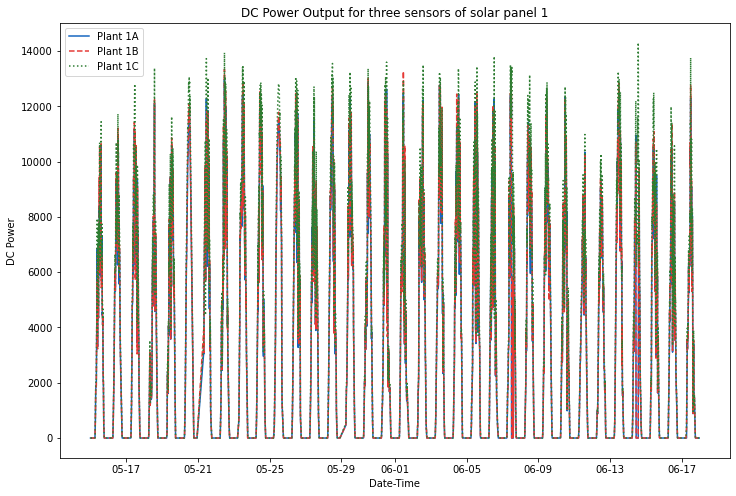

In [50]:
plotVars(df_all=[df_plant1a, df_plant1b, df_plant1c],
         var1='DATE_TIME',
         var2=['DC_POWER', 'DC_POWER', 'DC_POWER'],
         lab_all=['Plant 1A', 'Plant 1B', 'Plant 1C'],
         x_lab='Date-Time', y_lab='DC Power',
         title='DC Power Output for three sensors of solar panel 1')

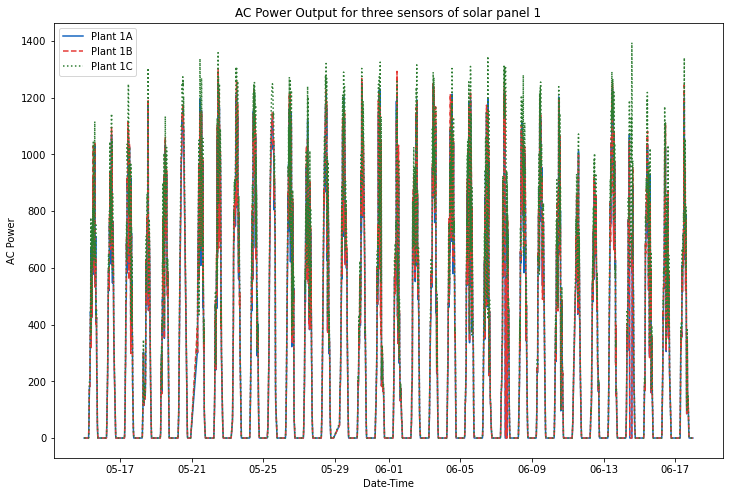

In [51]:
plotVars(df_all=[df_plant1a, df_plant1b, df_plant1c],
         var1='DATE_TIME',
         var2=['AC_POWER', 'AC_POWER', 'AC_POWER'],
         lab_all=['Plant 1A', 'Plant 1B', 'Plant 1C'],
         x_lab='Date-Time', y_lab='AC Power',
         title='AC Power Output for three sensors of solar panel 1')

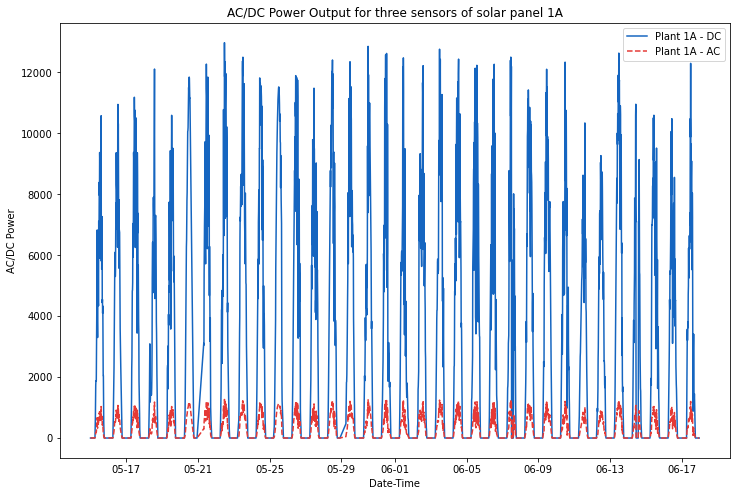

In [52]:
plotVars(df_all=[df_plant1a, df_plant1a],
         var1='DATE_TIME',
         var2=['DC_POWER', 'AC_POWER'],
         lab_all=['Plant 1A - DC', 'Plant 1A - AC'],
         x_lab='Date-Time', y_lab='AC/DC Power',
         title='AC/DC Power Output for three sensors of solar panel 1A')

Let's check the correlation between the AC/DC...

In [53]:
p_coef, p_value = stats.pearsonr(df_plant1a['DC_POWER'], df_plant1a['AC_POWER'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  0.999997101286152
P-Value: 0.0


#### Plant 2 AC/DC:

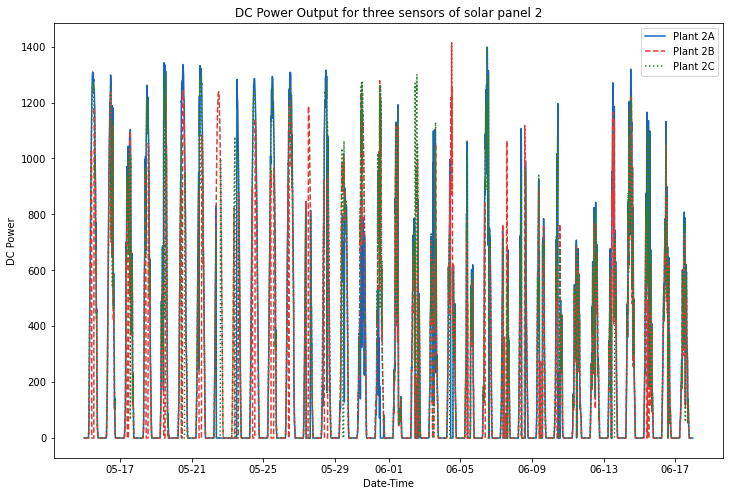

In [54]:
plotVars(df_all=[df_plant2a, df_plant2b, df_plant2c],
         var1='DATE_TIME',
         var2=['DC_POWER', 'DC_POWER', 'DC_POWER'],
         lab_all=['Plant 2A', 'Plant 2B', 'Plant 2C'],
         x_lab='Date-Time', y_lab='DC Power',
         title='DC Power Output for three sensors of solar panel 2')

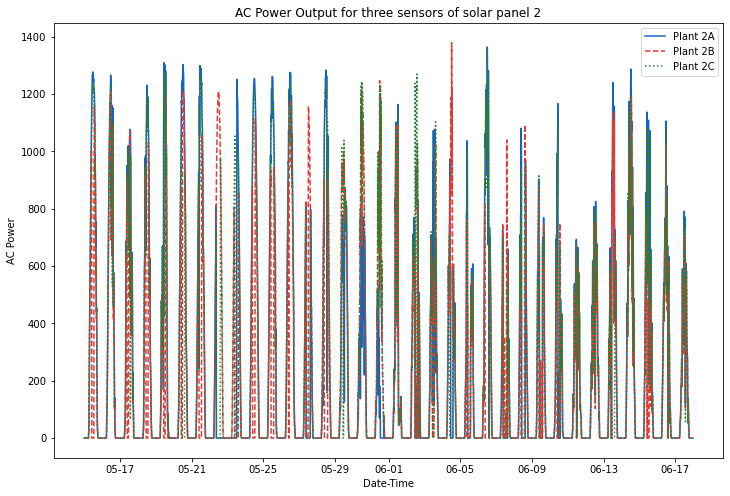

In [55]:
plotVars(df_all=[df_plant2a, df_plant2b, df_plant2c],
         var1='DATE_TIME',
         var2=['AC_POWER', 'AC_POWER', 'AC_POWER'],
         lab_all=['Plant 2A', 'Plant 2B', 'Plant 2C'],
         x_lab='Date-Time', y_lab='AC Power',
         title='AC Power Output for three sensors of solar panel 2')

Now we move to see the relation between the data register by the sensors and the DC output.

#### Weather Sensors:
Let's start looking at the irradiation seen by both panels:

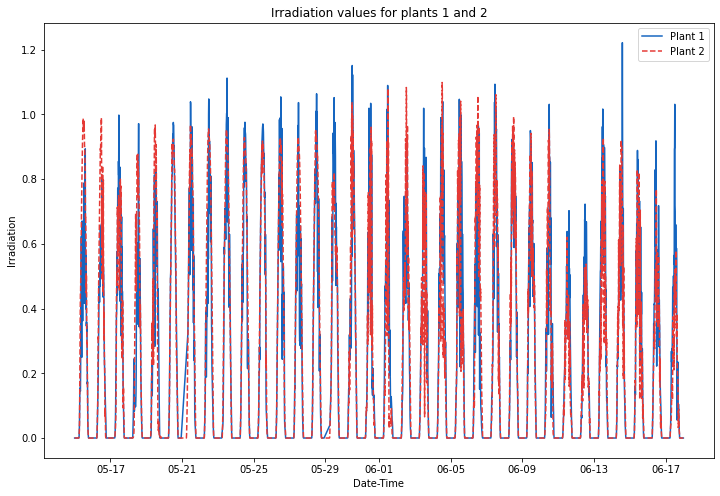

In [56]:
plotVars(df_all=[df_plant1a, df_plant2a],
         var1='DATE_TIME',
         var2=['IRRADIATION', 'IRRADIATION'],
         lab_all=['Plant 1', 'Plant 2'],
         x_lab='Date-Time', y_lab='Irradiation',
         title='Irradiation values for plants 1 and 2')

And then the temperatures

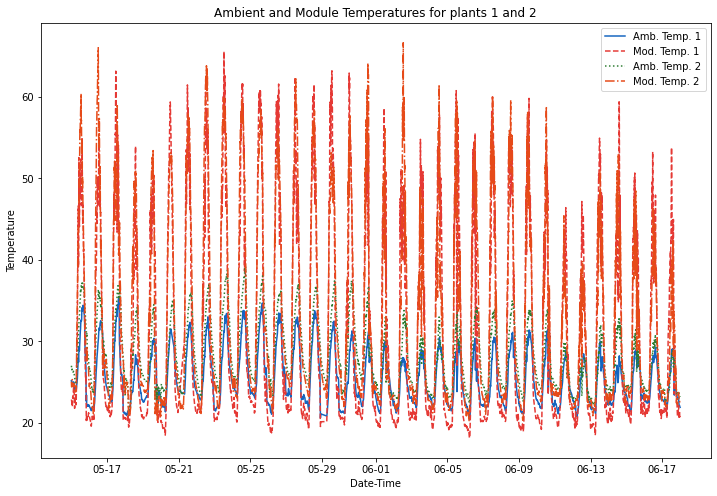

In [57]:
plotVars(df_all=[df_plant1a, df_plant1a, df_plant2a, df_plant2a],
         var1='DATE_TIME',
         var2=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'],
         lab_all=['Amb. Temp. 1', 'Mod. Temp. 1', 'Amb. Temp. 2', 'Mod. Temp. 2'],
         x_lab='Date-Time', y_lab='Temperature',
         title='Ambient and Module Temperatures for plants 1 and 2')

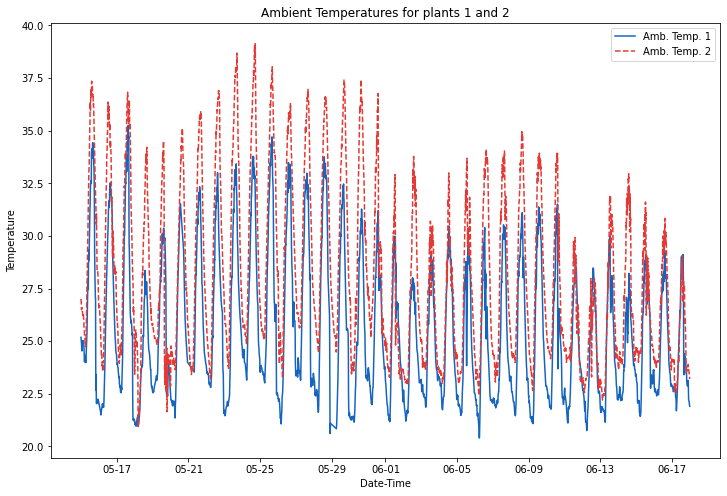

In [58]:
plotVars(df_all=[df_plant1a, df_plant2a],
         var1='DATE_TIME',
         var2=['AMBIENT_TEMPERATURE', 'AMBIENT_TEMPERATURE'],
         lab_all=['Amb. Temp. 1', 'Amb. Temp. 2'],
         x_lab='Date-Time', y_lab='Temperature',
         title='Ambient Temperatures for plants 1 and 2')

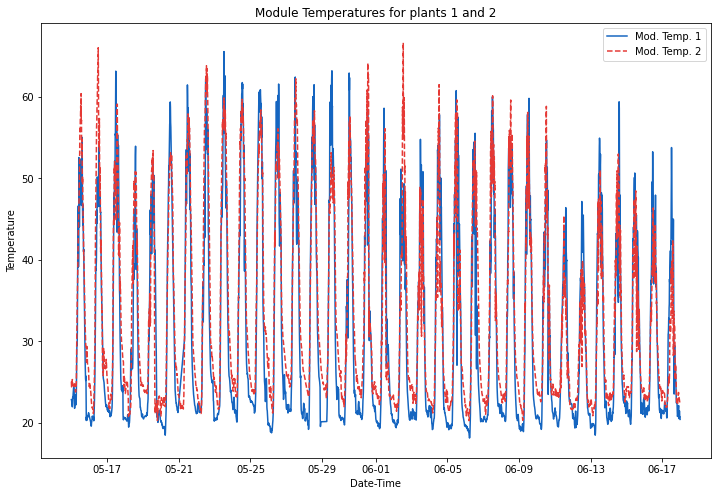

In [59]:
plotVars(df_all=[df_plant1a, df_plant2a],
         var1='DATE_TIME',
         var2=['MODULE_TEMPERATURE', 'MODULE_TEMPERATURE'],
         lab_all=['Mod. Temp. 1', 'Mod. Temp. 2'],
         x_lab='Date-Time', y_lab='Temperature',
         title='Module Temperatures for plants 1 and 2')

#### Plant 1 Analysis Power Generation and Environment:

Now we can check the influence of environment on the DC generation. For simplicity we consider only the data for the panel 1A.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

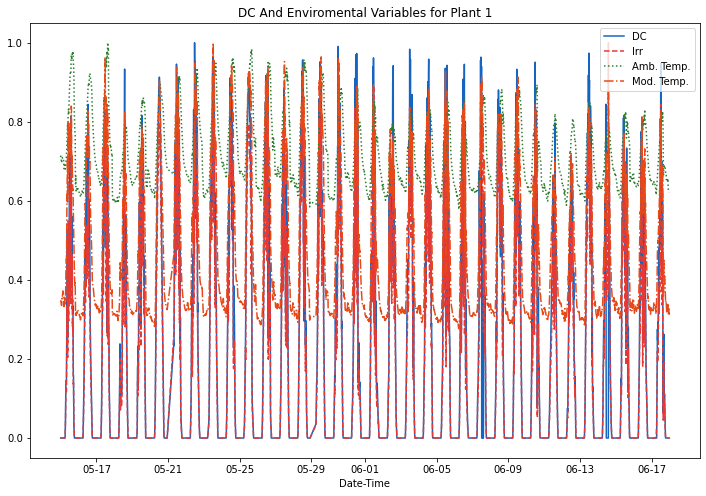

In [60]:
Imax = df_plant1a['IRRADIATION'].max()
ATmax = df_plant1a['AMBIENT_TEMPERATURE'].max()
MTmax = df_plant1a['MODULE_TEMPERATURE'].max()
DCmax = df_plant1a['DC_POWER'].max()

df1 = df_plant1a[['DATE_TIME', 'DC_POWER']]
df1['DC_POWER'] = df1[['DC_POWER']] / DCmax

df2 = df_plant1a[['DATE_TIME', 'IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']]
df2['IRRADIATION'] = df2['IRRADIATION'] / Imax
df2['AMBIENT_TEMPERATURE'] = df2['AMBIENT_TEMPERATURE'] / ATmax
df2['MODULE_TEMPERATURE'] = df2['MODULE_TEMPERATURE'] / MTmax

plotVars(df_all=[df1, df2, df2, df2],
         var1='DATE_TIME',
         var2=['DC_POWER', 'IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'],
         lab_all=['DC', 'Irr', 'Amb. Temp.', 'Mod. Temp.'],
         x_lab='Date-Time', y_lab='',
         title='DC And Enviromental Variables for Plant 1')

To verify the relationship between the variables, let's calculate the correlation between DC Power and the Irradiation

In [61]:
p_coef, p_value = stats.pearsonr(df_plant1a['DC_POWER'], df_plant1a['IRRADIATION'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  0.9691728954021622
P-Value: 0.0


It means that there is a strong relationship between DC and Irradiation, with absolut (basically) certainty.

Now let's check the correlation between DC and the ambient temperature:

In [62]:
p_coef, p_value = stats.pearsonr(df_plant1a['DC_POWER'], df_plant1a['AMBIENT_TEMPERATURE'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  0.7171613627599707
P-Value: 0.0


The correlation is no so strong as before, but there's something.

For DC and module temperature the correlation is:

In [63]:
p_coef, p_value = stats.pearsonr(df_plant1a['DC_POWER'], df_plant1a['MODULE_TEMPERATURE'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  0.940219795769841
P-Value: 0.0


Such correlation is quite strong, considerably larger than the correlation between power and ambien temperature

Finally, lets check the correlation between the environment and the daily yield

In [64]:
p_coef, p_value = stats.pearsonr(df_plant1a['DAILY_YIELD'], df_plant1a['IRRADIATION'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  0.04005526565866263
P-Value: 0.02445586287270929


The certaintity here is moderate, and the correlation is small...

Let's check it for the module temperature:

In [65]:
p_coef, p_value = stats.pearsonr(df_plant1a['DAILY_YIELD'], df_plant1a['MODULE_TEMPERATURE'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  0.16107382244253216
P-Value: 8.760109035407668e-20


The correlation is larger as before, with a good certainty. It's possible to say that there's a small influence of the module temperature on the daily yield of the solar panel.

#### Plant 2 Analysis Power Generation and Environment:

Now we can check the influence of environment on the DC generation. For simplicity we consider only the data for the panel 2A.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

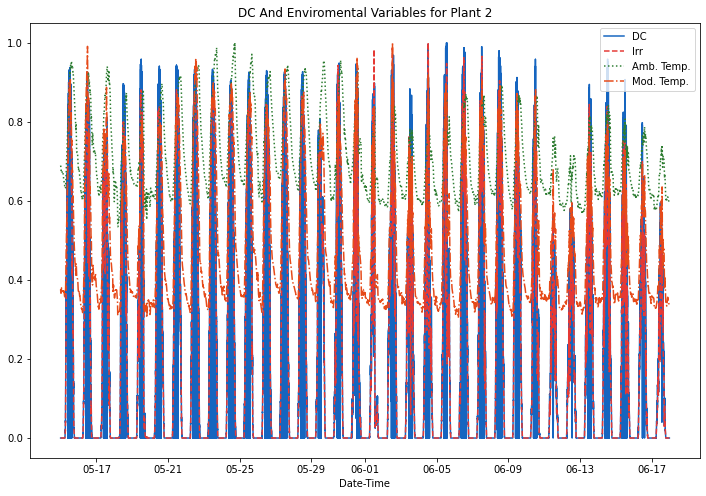

In [66]:
Imax = df_plant2_sen['IRRADIATION'].max()
ATmax = df_plant2_sen['AMBIENT_TEMPERATURE'].max()
MTmax = df_plant2_sen['MODULE_TEMPERATURE'].max()
DCmax = df_plant2_gen['DC_POWER'].max()

df1 = df_plant2_gen[['DATE_TIME', 'DC_POWER']]
df1['DC_POWER'] = df1[['DC_POWER']] / DCmax

df2 = df_plant2_sen[['DATE_TIME', 'IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE']]
df2['IRRADIATION'] = df2['IRRADIATION'] / Imax
df2['AMBIENT_TEMPERATURE'] = df2['AMBIENT_TEMPERATURE'] / ATmax
df2['MODULE_TEMPERATURE'] = df2['MODULE_TEMPERATURE'] / MTmax

plotVars(df_all=[df1, df2, df2, df2],
         var1='DATE_TIME',
         var2=['DC_POWER', 'IRRADIATION', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE'],
         lab_all=['DC', 'Irr', 'Amb. Temp.', 'Mod. Temp.'],
         x_lab='Date-Time', y_lab='',
         title='DC And Enviromental Variables for Plant 2')

Now we check the correlation between DC and Irradiation for the plant 2

In [67]:
p_coef, p_value = stats.pearsonr(df_plant2a['DC_POWER'], df_plant2a['IRRADIATION'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  0.7666549024434755
P-Value: 0.0


Surprisely, the correlation is considerably smaller than for the plant 1A!

Now for the correlation with the ambient temperature:

In [68]:
p_coef, p_value = stats.pearsonr(df_plant2a['DC_POWER'], df_plant2a['AMBIENT_TEMPERATURE'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  0.5345361332967796
P-Value: 2.711650509439353e-240


which is also smaller!

Now, for the module temperature:

In [69]:
p_coef, p_value = stats.pearsonr(df_plant2a['DC_POWER'], df_plant2a['MODULE_TEMPERATURE'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  0.7013389159236371
P-Value: 0.0


which is, again, smaller! Something is happening with the solar panel 2!

Now, let's check the correlation between the daily yield and the environmental variables:

In [70]:
p_coef, p_value = stats.pearsonr(df_plant2a['DAILY_YIELD'], df_plant2a['IRRADIATION'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  -0.07394250102023533
P-Value: 2.3854919663797227e-05


Relateviley small and negative! And larger in absolute value as for the plant 1A.

Finally, with the module temperature:

In [71]:
p_coef, p_value = stats.pearsonr(df_plant1a['DAILY_YIELD'], df_plant1a['MODULE_TEMPERATURE'])
print('Correlation Coef.: ', p_coef)
print('P-Value:', p_value)

Correlation Coef.:  0.16107382244253216
P-Value: 8.760109035407668e-20


Small, and of the same order for the case of plant 1A.

#### Daily and Total Yields

Finally, we can take a look on the yields of each panel...

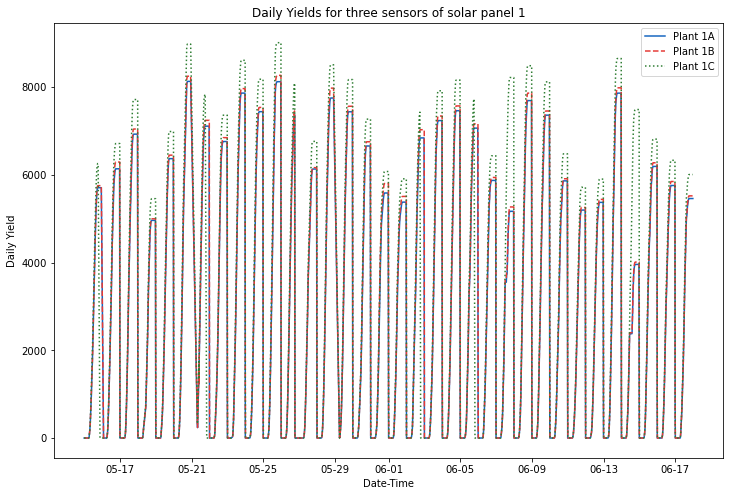

In [72]:
plotVars(df_all=[df_plant1a, df_plant1b, df_plant1c],
         var1='DATE_TIME',
         var2=['DAILY_YIELD', 'DAILY_YIELD', 'DAILY_YIELD'],
         lab_all=['Plant 1A', 'Plant 1B', 'Plant 1C'],
         x_lab='Date-Time', y_lab='Daily Yield',
         title='Daily Yields for three sensors of solar panel 1')

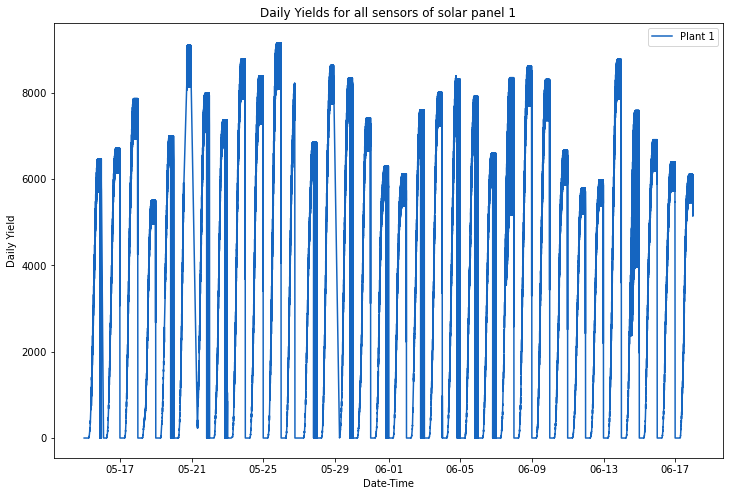

In [73]:
plotVars(df_all=[df_plant1_gen],
         var1='DATE_TIME',
         var2=['DAILY_YIELD'],
         lab_all=['Plant 1'],
         x_lab='Date-Time', y_lab='Daily Yield',
         title='Daily Yields for all sensors of solar panel 1')

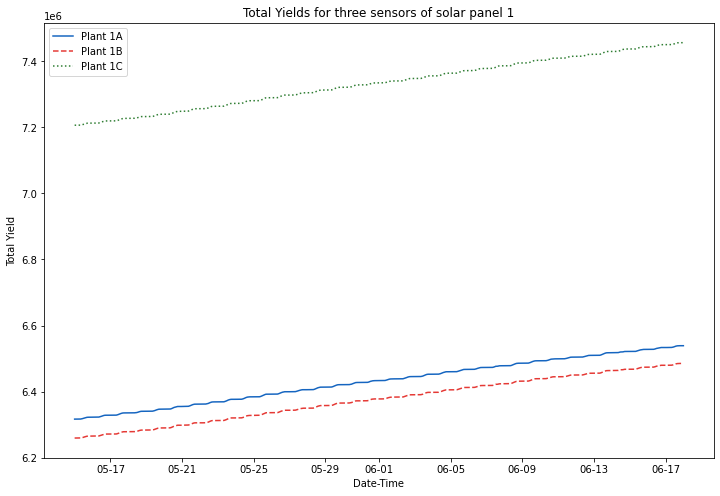

In [74]:
plotVars(df_all=[df_plant1a, df_plant1b, df_plant1c],
         var1='DATE_TIME',
         var2=['TOTAL_YIELD', 'TOTAL_YIELD', 'TOTAL_YIELD'],
         lab_all=['Plant 1A', 'Plant 1B', 'Plant 1C'],
         x_lab='Date-Time', y_lab='Total Yield',
         title='Total Yields for three sensors of solar panel 1')

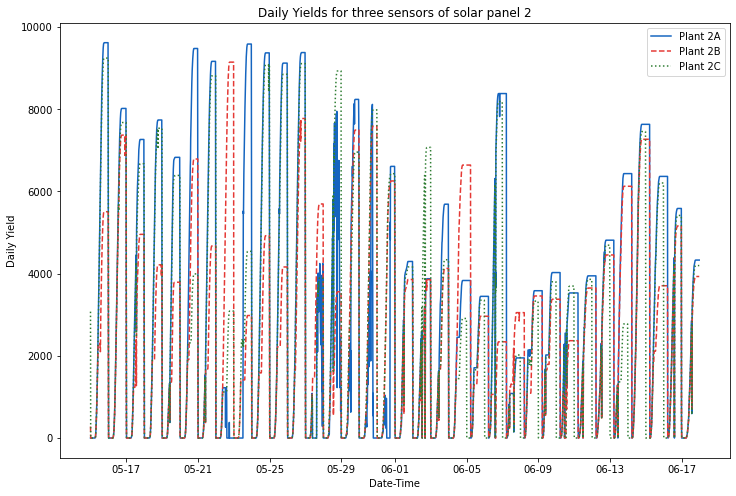

In [75]:
plotVars(df_all=[df_plant2a, df_plant2b, df_plant2c],
         var1='DATE_TIME',
         var2=['DAILY_YIELD', 'DAILY_YIELD', 'DAILY_YIELD'],
         lab_all=['Plant 2A', 'Plant 2B', 'Plant 2C'],
         x_lab='Date-Time', y_lab='Daily Yield',
         title='Daily Yields for three sensors of solar panel 2')

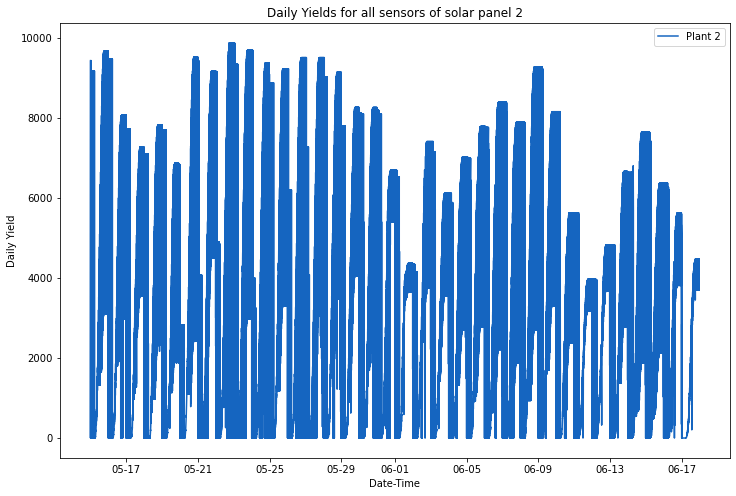

In [76]:
plotVars(df_all=[df_plant2_gen],
         var1='DATE_TIME',
         var2=['DAILY_YIELD'],
         lab_all=['Plant 2'],
         x_lab='Date-Time', y_lab='Daily Yield',
         title='Daily Yields for all sensors of solar panel 2')

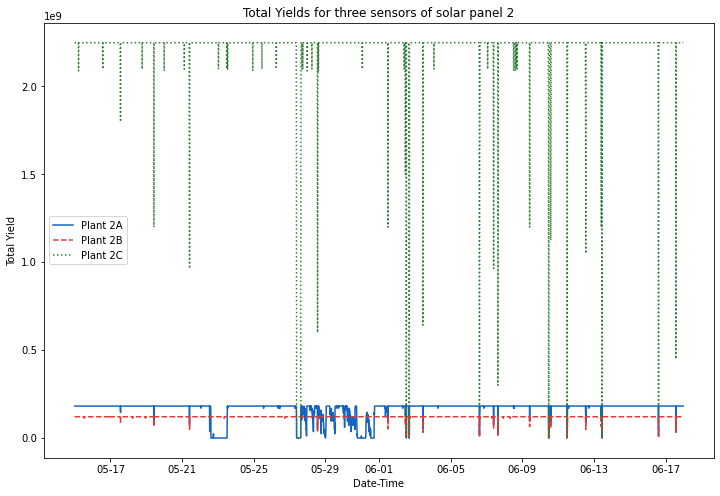

In [77]:
plotVars(df_all=[df_plant2a, df_plant2b, df_plant2c],
         var1='DATE_TIME',
         var2=['TOTAL_YIELD', 'TOTAL_YIELD', 'TOTAL_YIELD'],
         lab_all=['Plant 2A', 'Plant 2B', 'Plant 2C'],
         x_lab='Date-Time', y_lab='Total Yield',
         title='Total Yields for three sensors of solar panel 2')

### 6. Summary:

Lets review the data properties, through the `describe()` funtion, on the 6 new data sensors:

In [78]:
df_plant1a.describe()

PLANT_ID_x      DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
count      3155.0   3155.000000  3155.000000  3155.000000  3.155000e+03   
mean    4135001.0   2828.998291   276.778938  3146.858362  6.432819e+06   
std           0.0   3698.531647   361.579929  2873.834378  6.578766e+04   
min     4135001.0      0.000000     0.000000     0.000000  6.316803e+06   
25%     4135001.0      0.000000     0.000000     0.267857  6.376772e+06   
50%     4135001.0    285.000000    27.514286  2896.142857  6.437096e+06   
75%     4135001.0   5708.562500   559.431250  5777.169643  6.493334e+06   
max     4135001.0  12976.000000  1265.157143  8131.000000  6.539009e+06   

       PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
count      3155.0          3155.000000         3155.000000  3155.000000  
mean    4135001.0            25.561889           31.181901     0.230245  
std           0.0             3.351493           12.273902     0.301392  
min     4135001.0            20.398505           18.140415     0.000000  
25%     4135001.0            22.739631           21.135510     0.000000  
50%     4135001.0            24.682629           24.812990     0.028367  
75%     4135001.0            27.946022           41.449613     0.451674  
max     4135001.0            35.252486           65.545714     1.221652

In [79]:
df_plant1b.describe()

PLANT_ID_x      DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
count      3154.0   3154.000000  3154.000000  3154.000000  3.154000e+03   
mean    4135001.0   2873.720981   281.124073  3230.658151  6.377464e+06   
std           0.0   3761.145773   367.646871  2934.746921  6.689966e+04   
min     4135001.0      0.000000     0.000000     0.000000  6.259559e+06   
25%     4135001.0      0.000000     0.000000     1.129464  6.320403e+06   
50%     4135001.0    302.955357    29.261607  3019.187500  6.381896e+06   
75%     4135001.0   5775.531250   565.209375  5911.000000  6.439060e+06   
max     4135001.0  13335.142860  1300.171429  8268.000000  6.485319e+06   

       PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
count      3154.0          3154.000000         3154.000000  3154.000000  
mean    4135001.0            25.560769           31.182856     0.230310  
std           0.0             3.351434           12.275731     0.301417  
min     4135001.0            20.398505           18.140415     0.000000  
25%     4135001.0            22.739499           21.134045     0.000000  
50%     4135001.0            24.681477           24.807481     0.028563  
75%     4135001.0            27.939607           41.449680     0.451723  
max     4135001.0            35.252486           65.545714     1.221652

In [80]:
df_plant1c.describe()

PLANT_ID_x      DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
count      3133.0   3133.000000  3133.000000  3133.000000  3.133000e+03   
mean    4135001.0   3210.102563   313.900096  3407.255472  7.335465e+06   
std           0.0   4114.886897   402.009046  3212.990098  7.351422e+04   
min     4135001.0      0.000000     0.000000     0.000000  7.206408e+06   
25%     4135001.0      0.000000     0.000000     0.000000  7.272332e+06   
50%     4135001.0    446.714286    43.214286  2826.428571  7.339380e+06   
75%     4135001.0   6461.571429   632.985714  6435.000000  7.402816e+06   
max     4135001.0  14299.857140  1394.214286  9013.000000  7.456208e+06   

       PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
count      3133.0          3133.000000         3133.000000  3133.000000  
mean    4135001.0            25.564299           31.237183     0.231856  
std           0.0             3.360132           12.298276     0.301831  
min     4135001.0            20.398505           18.140415     0.000000  
25%     4135001.0            22.738440           21.130249     0.000000  
50%     4135001.0            24.678800           24.902235     0.030945  
75%     4135001.0            27.962351           41.660313     0.454001  
max     4135001.0            35.252486           65.545714     1.221652

In [81]:
df_plant2a.describe()

PLANT_ID_x     DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
count      3259.0  3259.000000  3259.000000  3259.000000  3.259000e+03   
mean    4136001.0   245.274699   239.830791  3223.327741  1.659413e+08   
std           0.0   375.893748   367.224445  3062.944072  4.624832e+07   
min     4136001.0     0.000000     0.000000     0.000000  0.000000e+00   
25%     4136001.0     0.000000     0.000000    56.066667  1.817268e+08   
50%     4136001.0     0.000000     0.000000  2677.466667  1.818154e+08   
75%     4136001.0   441.188095   433.152143  5587.000000  1.818653e+08   
max     4136001.0  1398.480000  1363.513333  9621.000000  1.819119e+08   

       PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
count      3259.0          3259.000000         3259.000000  3259.000000  
mean    4136001.0            28.069400           32.772408     0.232737  
std           0.0             4.061556           11.344034     0.312693  
min     4136001.0            20.942385           20.265123     0.000000  
25%     4136001.0            24.602135           23.716881     0.000000  
50%     4136001.0            26.981263           27.534606     0.019040  
75%     4136001.0            31.056757           40.480653     0.438717  
max     4136001.0            39.181638           66.635953     1.098766

In [82]:
df_plant2b.describe()

PLANT_ID_x     DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
count      3259.0  3259.000000  3259.000000  3259.000000  3.259000e+03   
mean    4136001.0   209.158443   204.664730  2680.058759  1.201762e+08   
std           0.0   329.589960   322.299061  2375.472416  8.393823e+06   
min     4136001.0     0.000000     0.000000     0.000000  0.000000e+00   
25%     4136001.0     0.000000     0.000000   241.933333  1.210106e+08   
50%     4136001.0     0.000000     0.000000  2368.200000  1.210585e+08   
75%     4136001.0   356.540000   349.926667  4128.000000  1.210914e+08   
max     4136001.0  1414.120000  1378.766667  9148.000000  1.211314e+08   

       PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
count      3259.0          3259.000000         3259.000000  3259.000000  
mean    4136001.0            28.069400           32.772408     0.232737  
std           0.0             4.061556           11.344034     0.312693  
min     4136001.0            20.942385           20.265123     0.000000  
25%     4136001.0            24.602135           23.716881     0.000000  
50%     4136001.0            26.981263           27.534606     0.019040  
75%     4136001.0            31.056757           40.480653     0.438717  
max     4136001.0            39.181638           66.635953     1.098766

In [83]:
df_plant2c.describe()

PLANT_ID_x     DC_POWER     AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
count      3259.0  3259.000000  3259.000000  3259.000000  3.259000e+03   
mean    4136001.0   244.653027   239.281783  2793.966510  2.215144e+09   
std           0.0   369.796466   361.384153  2885.140396  2.430265e+08   
min     4136001.0     0.000000     0.000000     0.000000  0.000000e+00   
25%     4136001.0     0.000000     0.000000     0.000000  2.247772e+09   
50%     4136001.0     0.000000     0.000000  2002.466667  2.247836e+09   
75%     4136001.0   449.168810   440.860714  4543.000000  2.247874e+09   
max     4136001.0  1396.586667  1361.666667  9246.000000  2.247916e+09   

       PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
count      3259.0          3259.000000         3259.000000  3259.000000  
mean    4136001.0            28.069400           32.772408     0.232737  
std           0.0             4.061556           11.344034     0.312693  
min     4136001.0            20.942385           20.265123     0.000000  
25%     4136001.0            24.602135           23.716881     0.000000  
50%     4136001.0            26.981263           27.534606     0.019040  
75%     4136001.0            31.056757           40.480653     0.438717  
max     4136001.0            39.181638           66.635953     1.098766

And now lets see how we can describe some of the interesting values, using `boxplot`.

#### For Plant 1 (A, B, C):

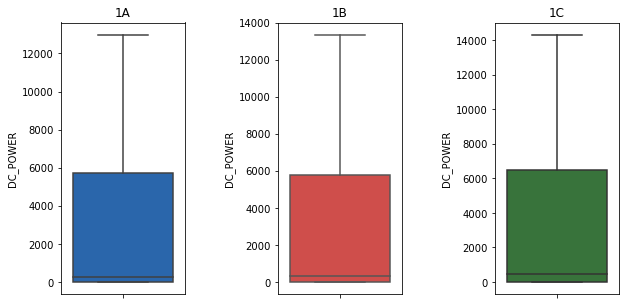

In [84]:
plotBox(df=[df_plant1a, df_plant1b, df_plant1c],
        y_val='DC_POWER',
       titles_all=['1A', '1B', '1C'])

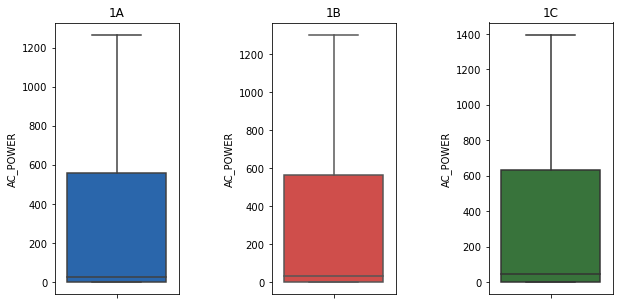

In [85]:
plotBox(df=[df_plant1a, df_plant1b, df_plant1c],
        y_val='AC_POWER',
       titles_all=['1A', '1B', '1C'])

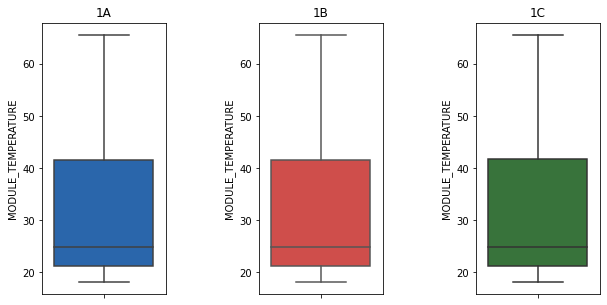

In [86]:
plotBox(df=[df_plant1a, df_plant1b, df_plant1c],
        y_val='MODULE_TEMPERATURE',
       titles_all=['1A', '1B', '1C'])

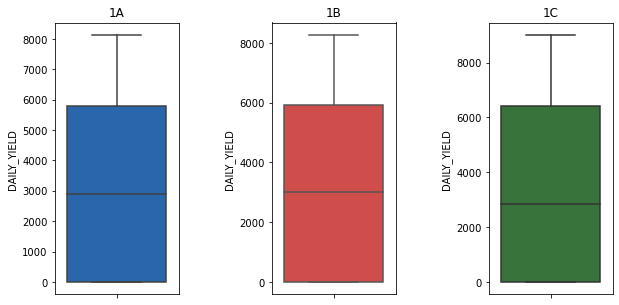

In [87]:
plotBox(df=[df_plant1a, df_plant1b, df_plant1c],
        y_val='DAILY_YIELD',
       titles_all=['1A', '1B', '1C'])

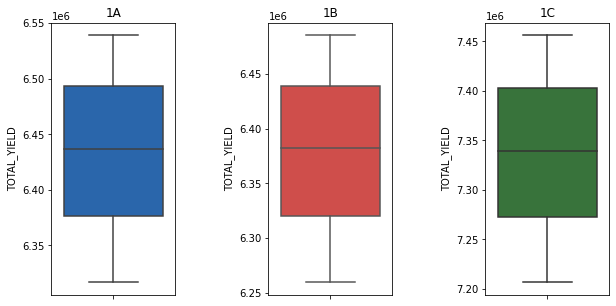

In [88]:
plotBox(df=[df_plant1a, df_plant1b, df_plant1c],
        y_val='TOTAL_YIELD',
       titles_all=['1A', '1B', '1C'])

Apparently no outliers on any of the considered data sets!

We check now the correlation matrices:

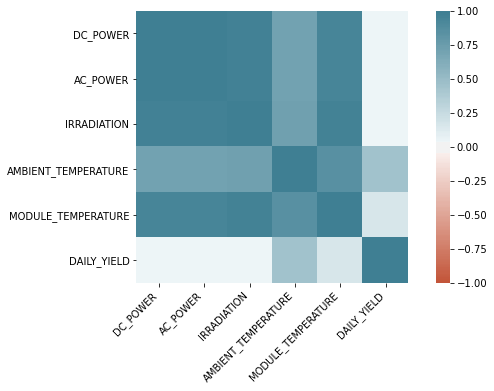

In [89]:
cols = ['DC_POWER', 'AC_POWER', 'IRRADIATION',
        'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
        'DAILY_YIELD']
plotCorr(df_plant1a, cols)

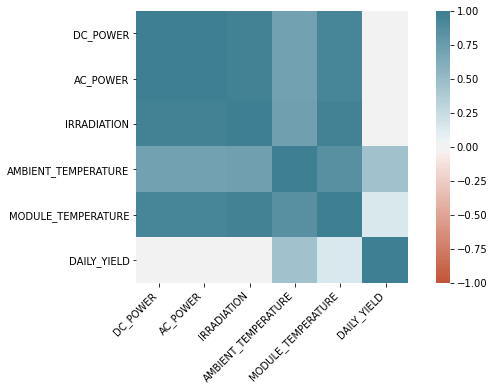

In [90]:
cols = ['DC_POWER', 'AC_POWER', 'IRRADIATION',
        'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
        'DAILY_YIELD']
plotCorr(df_plant1b, cols)

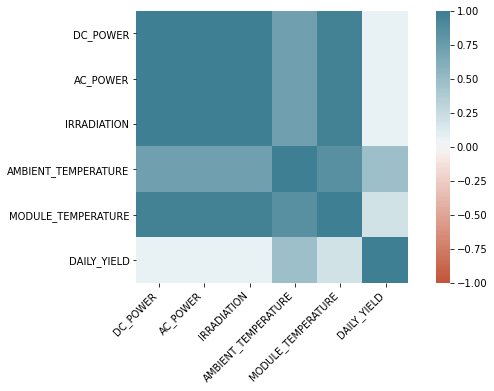

In [91]:
cols = ['DC_POWER', 'AC_POWER', 'IRRADIATION',
        'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
        'DAILY_YIELD']
plotCorr(df_plant1c, cols)

As expected, a strong correlation between the AC/DC power outputs is seen, and between the irradiation and the power as well. The module temperature has a larger influence (correlation) than the ambient temperature on the output.

#### Plant 2 (A, B, C):

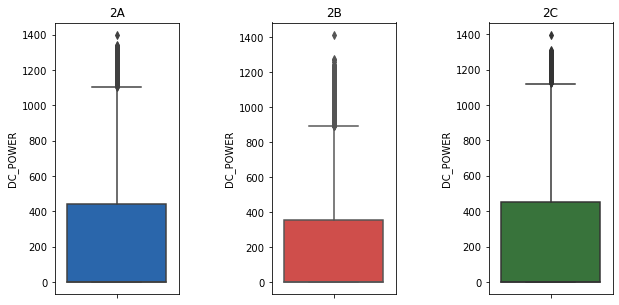

In [92]:
plotBox(df=[df_plant2a, df_plant2b, df_plant2c],
        y_val='DC_POWER',
       titles_all=['2A', '2B', '2C'])

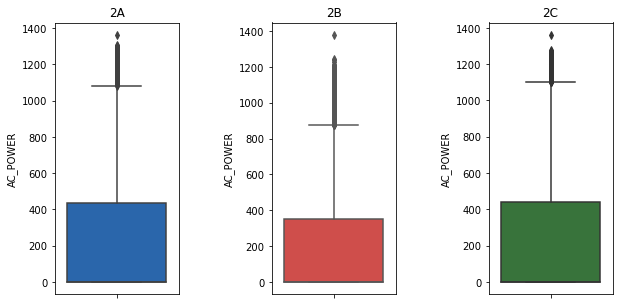

In [93]:
plotBox(df=[df_plant2a, df_plant2b, df_plant2c],
        y_val='AC_POWER',
       titles_all=['2A', '2B', '2C'])

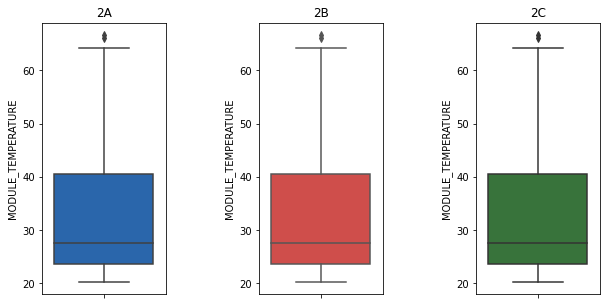

In [94]:
plotBox(df=[df_plant2a, df_plant2b, df_plant2c],
        y_val='MODULE_TEMPERATURE',
       titles_all=['2A', '2B', '2C'])

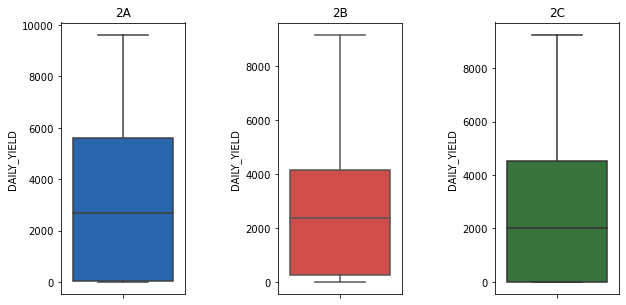

In [95]:
plotBox(df=[df_plant2a, df_plant2b, df_plant2c],
        y_val='DAILY_YIELD',
       titles_all=['2A', '2B', '2C'])

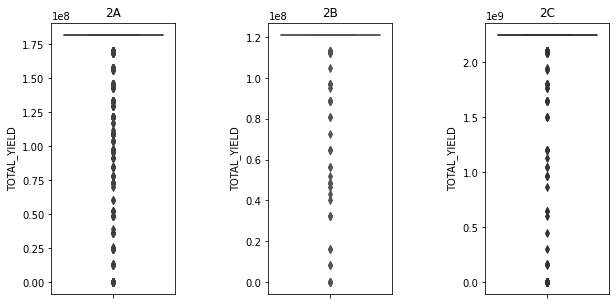

In [96]:
plotBox(df=[df_plant2a, df_plant2b, df_plant2c],
        y_val='TOTAL_YIELD',
       titles_all=['2A', '2B', '2C'])

We see several outliers for all data obtained from the Plant 2! Particularly on the Total Yield measurements. It worth to explore if it is a problem of some faulty sensor or some problems in the plant intself.

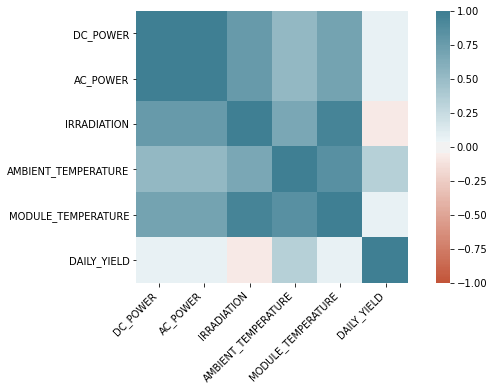

In [97]:
cols = ['DC_POWER', 'AC_POWER', 'IRRADIATION',
        'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
        'DAILY_YIELD']
plotCorr(df_plant2a, cols)

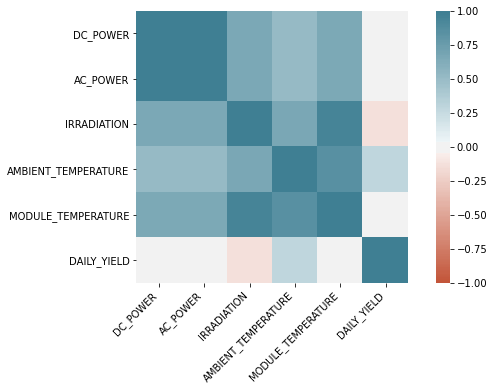

In [98]:
cols = ['DC_POWER', 'AC_POWER', 'IRRADIATION',
        'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
        'DAILY_YIELD']
plotCorr(df_plant2b, cols)

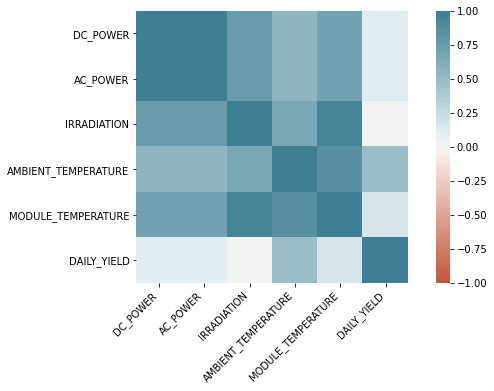

In [99]:
cols = ['DC_POWER', 'AC_POWER', 'IRRADIATION',
        'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE',
        'DAILY_YIELD']
plotCorr(df_plant2c, cols)

This time we see a relative similar behavior as the one in plant 1, but here the correlation of the utput power with the irradiation is smaller. Also the module temperature has a smaller correlation with the output power. Such behavior and the large number of outliers in the total yield make us suspect that there are some problems with the measurements and with the solar panel itself.